In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


In [2]:
data = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")

In [3]:
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [4]:
data.info

<bound method DataFrame.info of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2     

In [5]:
data.shape

(36275, 19)

In [6]:
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

checking for missing values

In [7]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df = data.copy()

dropping unnecessary data

In [9]:
df =df.drop('Booking_ID',axis=1)

In [10]:
cat_variable = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']

In [11]:
num_variable = df.drop((cat_variable),axis=1)

In [12]:
num_variable

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0


In [13]:
df.booking_status = df.booking_status.replace({"Not_Canceled":0, "Canceled":1})

In [14]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


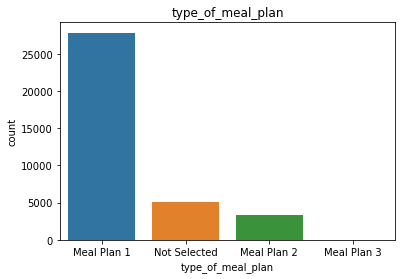

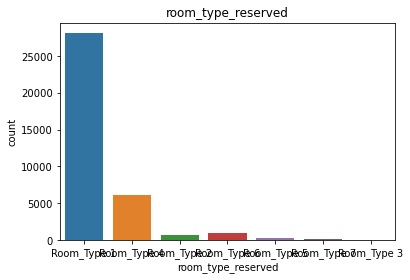

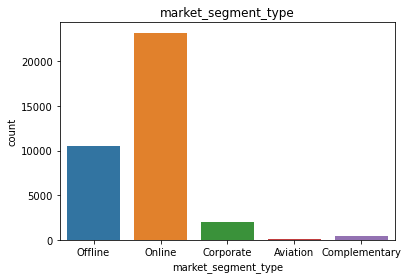

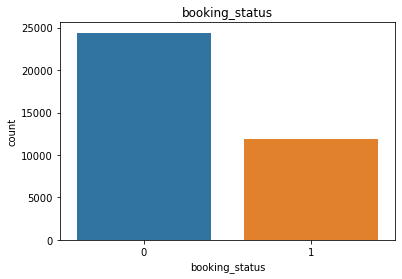

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in cat_variable:
    ax=sns.countplot(x=df[i], data=df);
    plt.title(i)
    plt.show()
    plt.tight_layout

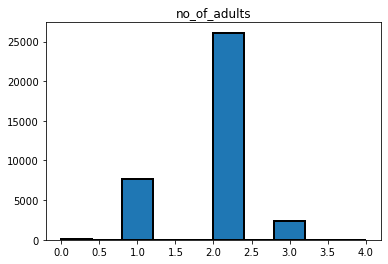

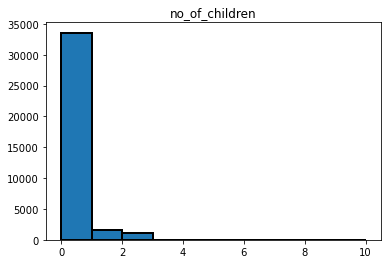

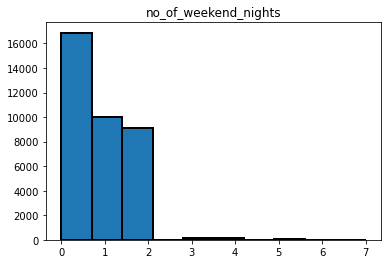

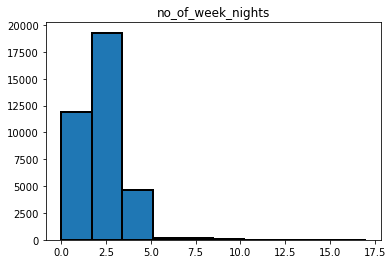

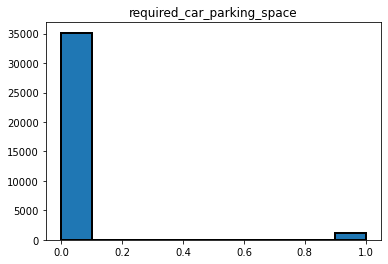

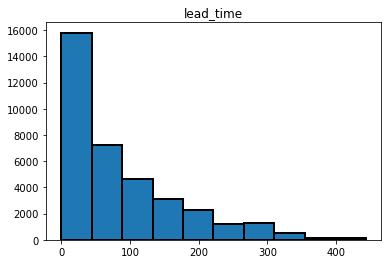

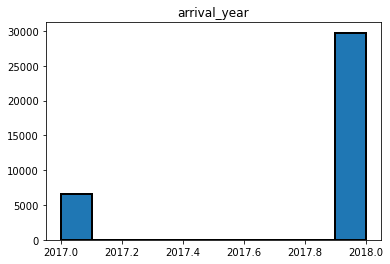

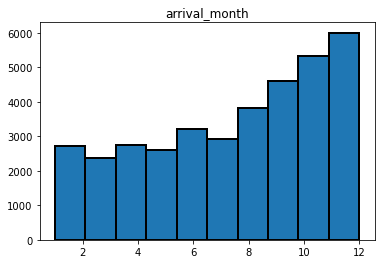

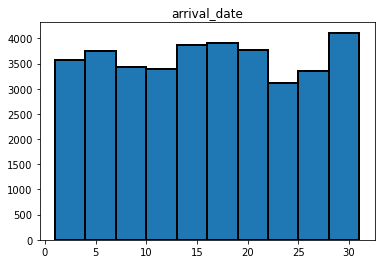

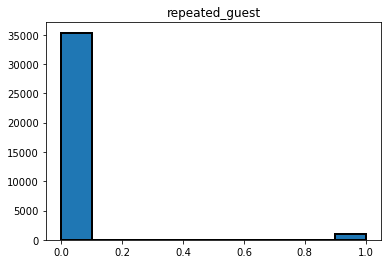

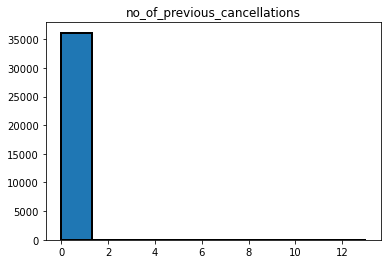

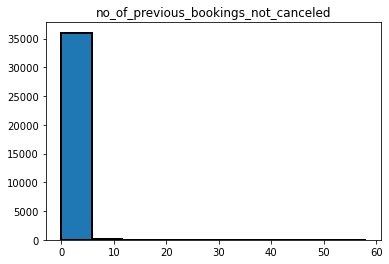

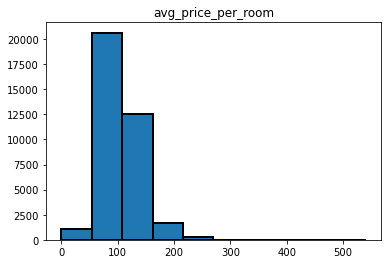

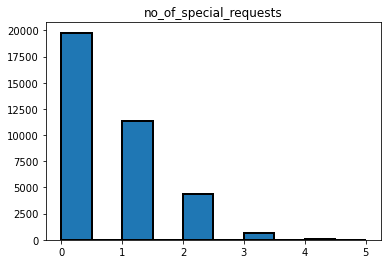

In [16]:
for i in num_variable:
    plt.hist(df[i],   edgecolor='black',linewidth=2)
    plt.title(i)
    plt.show()

correlation****

<AxesSubplot:>

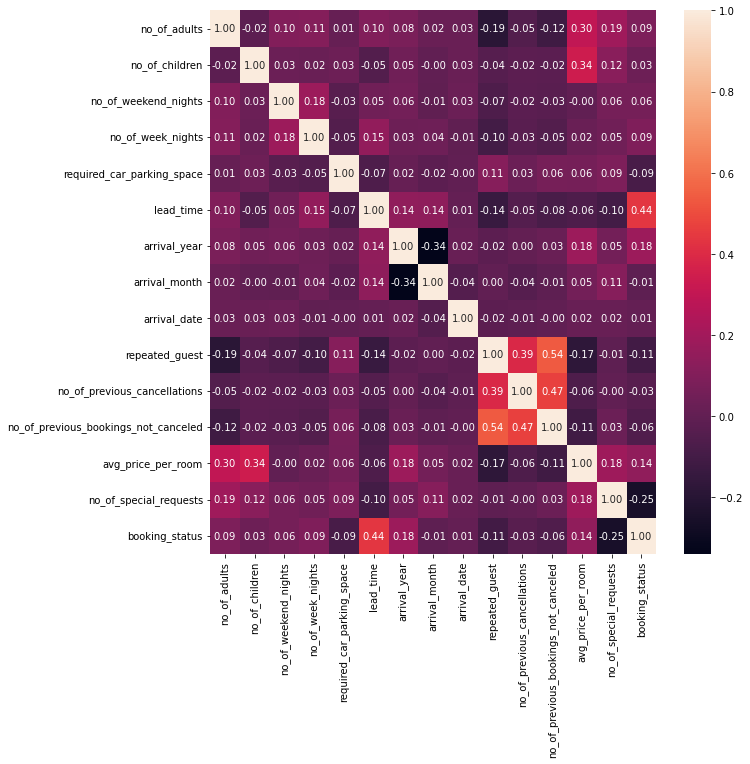

In [17]:
df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

In [18]:
a = pd.get_dummies(df['type_of_meal_plan'],drop_first=True)
b = pd.get_dummies(df['room_type_reserved'],drop_first=True)
c = pd.get_dummies(df['market_segment_type'],drop_first=True)
df = pd.concat((df,a,b,c),axis=1)

In [19]:
df=df.drop(['type_of_meal_plan','room_type_reserved','market_segment_type','arrival_year'],axis=1)

In [20]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
0,2,0,1,2,0,224,10,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,6,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,28,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,20,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,4,11,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,8,3,0,0,...,0,0,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,10,17,0,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,4,21,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
Y = df.booking_status
X = df.drop(columns="booking_status")

In [22]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
0,2,0,1,2,0,224,10,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,6,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,28,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,20,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,4,11,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,8,3,0,0,...,0,0,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,10,17,0,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,4,21,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
Y

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
df['lead_time'] = sc.fit_transform(df[['lead_time']])

In [27]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.2, random_state=42,stratify = Y)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [29]:
y_predict = rf.predict(test_x)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_predict)

In [31]:
cm

array([[4654,  224],
       [ 455, 1922]])

In [32]:
rf.score(test_x,test_y)

0.9064093728463128